# Проект: Обучение с учителем: качество модели

**Цели проекта:** 
1.	Разработать модель, которая предскажет вероятность снижения покупательской активности.
2.	Выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность. 

**Описание данных**

Данные для работы находятся в нескольких таблицах:

**market_file.csv - таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.**

•	id — номер покупателя в корпоративной базе данных.

•	Покупательская активность («снизилась» или «прежний уровень»).

•	Тип сервиса — уровень сервиса, например «премиум» и «стандарт».

•	Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. 

•	Маркет_актив__6_мес — среднемесячное значение маркетинговых коммуникаций компании на покупателя за последние 6 месяцев. 

•	Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.

•	Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.

•	Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.

•	Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.

•	Средний_просмотр_категорий_за_визит — сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

•	Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.

•	Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.

•	Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


**market_money.csv - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.**

•	id — номер покупателя в корпоративной базе данных.

•	Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.

•	Выручка — сумма выручки за период.


**market_time.csv - таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.**

•	id — номер покупателя в корпоративной базе данных.

•	Период — название периода, во время которого зафиксировано общее время.

•	минут — значение времени, проведённого на сайте, в минутах.

**money.csv - таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.**

•	id — номер покупателя в корпоративной базе данных.

•	Прибыль — значение прибыли.



**План работы:**

**Шаг 1. Загрузка данных.**
 - Файлы: market_file.csv, market_money.csv, market_time.csv, money.csv 

**Шаг 2. Предобработка данных**

**Шаг 3. Исследовательский анализ данных**

**Шаг 4. Объединение таблиц**

**Шаг 5. Корреляционный анализ**

**Шаг 6. Использование пайплайнов**

  - 6.1 Подготовка данных 
  - 6.2 Обучение четырех моделей: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). Для каждой из них подберите как минимум один гиперпараметр. Выбор подходящей для задачи метрики.
  - 6.3 Выбор лучшей модели, используя заданную метрику. 

**Шаг 7. Анализ важности признаков**

  - 7.1 Оценить важность признаков для лучшей модели и постройте график важности с помощью метода SHAP. 
  - 7.2 Сделайте выводы о значимости признаков.


**Шаг 8. Сегментация покупателей**
  - 8.1 Выполнить сегментацию покупателей. 
  - 8.2 Выбрать группу покупателей и предложите, как увеличить её покупательскую активность.
  - 8.3 Сделать выводы о сегментах.

**Шаг 9. Общий вывод**



## Загрузка данных

Импортируем библиотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import shap
import warnings
from phik.report import plot_correlation_matrix
from phik import report


from sklearn.model_selection import train_test_split

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler
)
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score, precision_score

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from optuna.integration import OptunaSearchCV 

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


warnings.simplefilter(action='ignore', category=FutureWarning)

### Загрузим данные. 

Файлы market_file.csv, market_money.csv, market_time.csv, money.csv доступны по ссылкам в описании данных или через пути к ним:

•	/datasets/market_file.csv

•	/datasets/market_money.csv

•	/datasets/market_time.csv

•	/datasets/money.csv


In [2]:
market_file = pd.read_csv('market_file.csv', sep = ',')
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


Присутствует опечатка в значениях столбца 'Тип сервиса': 'стандартт'. Исправим на шаге 2. 

Возможны лишние пробелы в значениях столбца 'Популярная_категория'. Исправим на шаге 2. 

Переименуем столбцы  'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать'

In [3]:
market_file.rename(columns={
    'Покупательская активность':'Покупательская_активность',
    'Тип сервиса':'Тип_сервиса',
    'Разрешить сообщать':'Разрешить_сообщать',
    'Популярная_категория':'Поп_кат'
}, inplace=True)

print(market_file.columns)

Index(['id', 'Покупательская_активность', 'Тип_сервиса', 'Разрешить_сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Поп_кат', 'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')


In [4]:
market_money = pd.read_csv('market_money.csv', sep = ',')
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [5]:
market_time = pd.read_csv('market_time.csv', sep = ',')
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


Присутствует опечатка в значениях столбца 'Период': 'предыдцщий_месяц'. Исправим на шаге 2.

In [6]:
money = pd.read_csv('money.csv', sep = ';', decimal=',')
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Данные выглядят корректными, кроме опечатки в столбце 'Период'. Исправим на следующем шаге.

**Вывод: Подключены необходимые библиотеки для работы с данными и визуализации. Созданы датафреймы, изучены типы данных, названия столбцов, данные выглядят корректными, найдены опечатки.**

## Предобработка данных

### Проверим наличие пропусков в данных.

In [7]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская_активность            1300 non-null   object 
 2   Тип_сервиса                          1300 non-null   object 
 3   Разрешить_сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Поп_кат                              1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

В market_file пропусков нет.

Исправим опечатку в столбце 'Тип_сервиса'.

In [8]:
market_file['Тип_сервиса'] = market_file['Тип_сервиса'].replace('стандартт', 'стандарт')
market_file['Тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [9]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


В market_money пропусков нет.

In [10]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


В market_time пропусков нет.

Исправим опечатку в столбце 'Период'.

In [11]:
market_time['Период'] = market_time['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
market_time['Период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

In [12]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Пропуски в данных отсутствуют.

### Проверим наличие дубликатов в данных.

Проверим, есть ли явные дубликаты.

In [13]:
market_file.duplicated().sum()

0

In [14]:
market_money.duplicated().sum()

0

In [15]:
market_time.duplicated().sum()

0

In [16]:
money.duplicated().sum()

0

Явных дубликатов нет.

Проверим, есть ли неявные дубликаты.

In [17]:
market_file['Покупательская_активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [18]:
market_file['Поп_кат'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

In [19]:
market_money['Период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

Неявных дубликатов нет.

На данном этапе была проведена предобработка данных. Типы данных в норме, пропуски не обнаружены, исправлены опечатки в столбцах.

**Вывод: Пропуски в данных отсутствуют. Явных дубликатов нет. Неявных дубликатов нет. Исправлена опечатка в столбце 'Период', 'Тип_сервиса'.**

## Исследовательский анализ данных

**Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.**

In [20]:
active_clients_id = market_money.loc[market_money['Выручка'] == 0, 'id'].unique()
money = money[~money['id'].isin(active_clients_id)]
market_money = market_money.loc[~market_money['id'].isin(active_clients_id), :]
market_file = market_file.loc[~market_file['id'].isin(active_clients_id), :]
market_time = market_time.loc[~market_time['id'].isin(active_clients_id), :]

**Исследуем датафрейм market_file**

In [21]:
market_file.describe()

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,215998.986893,4.254433,4.009252,602.993832,0.320547,3.267540,2.841172,4.184271,8.186584
std,374.578554,1.015618,0.696048,249.101456,0.249657,1.354623,1.973451,1.950973,3.977061
min,215349.000000,0.900000,3.000000,121.000000,0.110000,1.000000,0.000000,0.000000,1.000000
25%,215675.000000,3.700000,4.000000,410.000000,0.170000,2.000000,1.000000,3.000000,5.000000
50%,215999.000000,4.200000,4.000000,607.000000,0.240000,3.000000,3.000000,4.000000,8.000000
75%,216323.000000,4.900000,4.000000,806.000000,0.300000,4.000000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000


Маркет_актив__6_мес (среднемесячное значение маркетинговых коммуникаций компании на покупателя за последние 6 месяцев): медиана равна 4.2 со стандартным отклонением 1.

Маркет_актив_тек_мес: медиана равна 4 со стандартным отклонением 0.7. 

Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте: медиана равна 607 с достаточно высоким стандартным отклонением 250.

Акционные_покупки, процент акционных покупок: медиана равна 0.24 с достаточно большим отклонением 0.25, но в целом это довольно высокая доля акционных покупок, что, вероятно, говорит о том, что акции пользуются популярностью и выгодны как для покупателей, так и для компании.

Средний_просмотр_категорий_за_визит: медиана равна 3 со стандартным отклонением 1.35.

Неоплаченные_продукты_штук_квартал: медиана равна 3 со достаточно большим стандартным отклонением 1.97.

Ошибка_сервиса, число сбоев, которые коснулись покупателя во время посещения сайта: медиана равна 4 со стандартным отклонением 1.95.

Страниц_за_визит: медиана равна 8 со стандартным отклонением 3.97.

Средние и медианы не сильно отличаются, скорее всего, выбросы единичны и\или невелики.


**Проанализируем гистограммы для столбцов  'Маркет_актив__6_мес',  'Длительность' и  'Акционные покупки'**

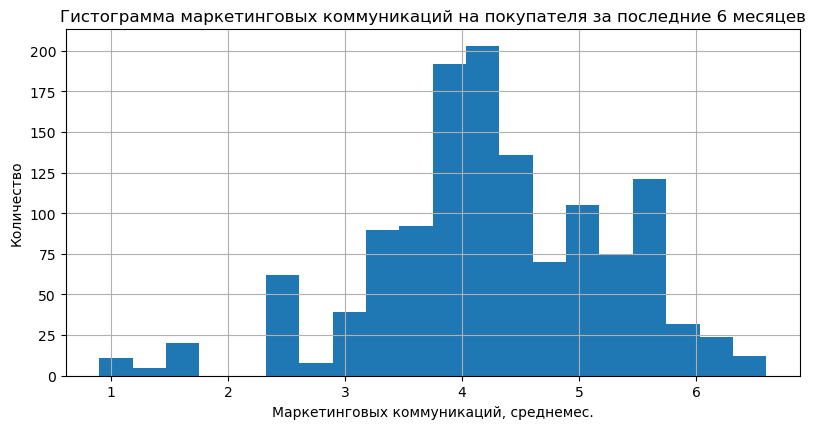

In [22]:
market_file['Маркет_актив_6_мес'].hist(bins=20, figsize=(8, 4), grid=True)

plt.tight_layout()
plt.xlabel('Маркетинговых коммуникаций, среднемес.')
plt.ylabel('Количество')
plt.title(f'Гистограмма маркетинговых коммуникаций на покупателя за последние 6 месяцев')
plt.show()

Среднемесячное значение маркетинговых коммуникаций компании на покупателя за последние 6 месяцев имеет пик около 4, и небольшие пики около 2.5 и 5.5. В целом у большинства пользователей достаточно высокое среднемесячное количество коммуникаций - около 4 и более.

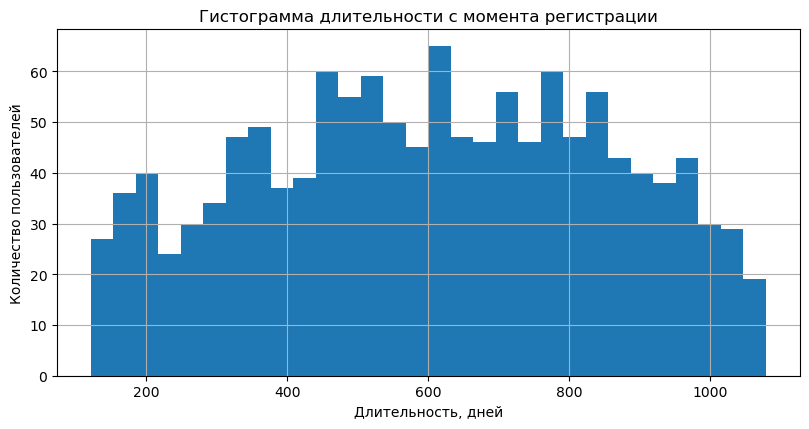

In [23]:
market_file['Длительность'].hist(bins=30, figsize=(8, 4), grid=True)

plt.tight_layout()
plt.xlabel('Длительность, дней')
plt.ylabel('Количество пользователей')
plt.title(f'Гистограмма длительности с момента регистрации')
plt.show()

Гистограмма длительности имеет один пик в значении около 600-610, и несколько небольших пиков по всей оси x, что говорито о том, что были локальные пики регистрации пользователей, возможно при рекламных акциях или сезонах распродаж.

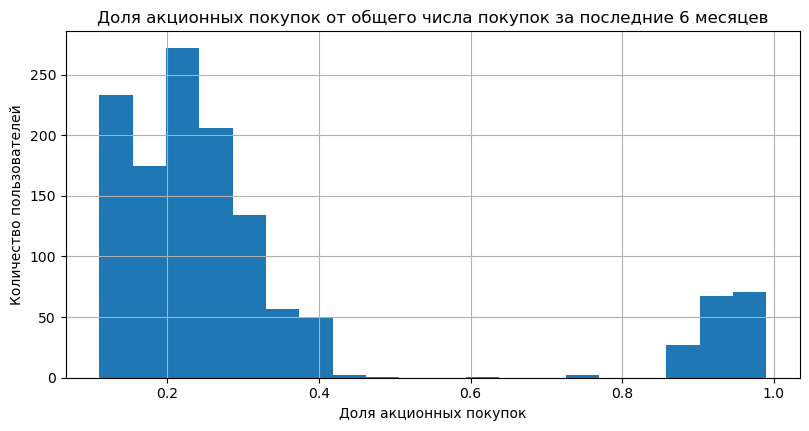

In [24]:
market_file['Акционные_покупки'].hist(bins=20, figsize=(8, 4), grid=True)

plt.tight_layout()
plt.xlabel('Доля акционных покупок')
plt.ylabel('Количество пользователей')
plt.title(f'Доля акционных покупок от общего числа покупок за последние 6 месяцев')
plt.show()

Гистограмма доли акционных покупок от общего числа покупок имеет два пика: около 0.3 и 0.9. Таким образом, пользователи делятся на две группы: те, кто покупают в основном только по акции и те, кто используют акционные предложения только в 10-40 % покупок.

**Проанализируем столбчатые диаграммы 'Покупательская_активность',	'Тип_сервиса',	'Разрешить_сообщать',  'Маркет_актив_тек_мес',	'Средний_просмотр_категорий_за_визит',	'Неоплаченные_продукты_штук_квартал',	'Ошибка_сервиса',	'Страниц_за_визит'**

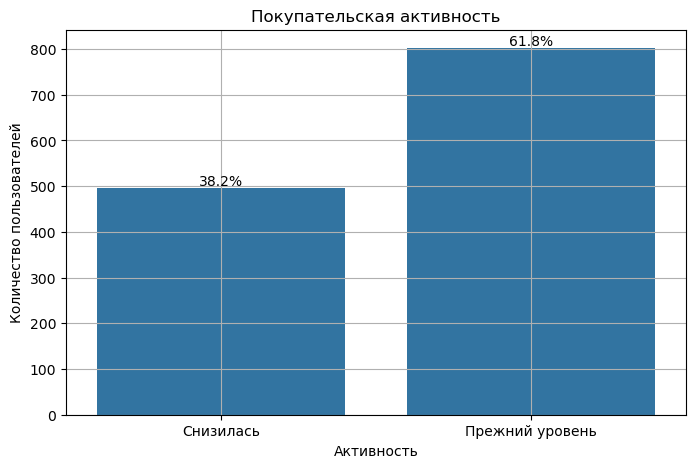

In [25]:
plt.figure(figsize=(8, 5))
ax = sn.countplot(x='Покупательская_активность', data=market_file)

total = len(market_file) 
for p in ax.patches:
    height = p.get_height()  # Высота столбца
    percentage = (height / total) * 100  # Вычисление процента
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

plt.title('Покупательская активность')
plt.xlabel('Активность')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

У 62% покупателей прежний уровень активность, а 38 % покупателей имеют уровень активность "снизилась".

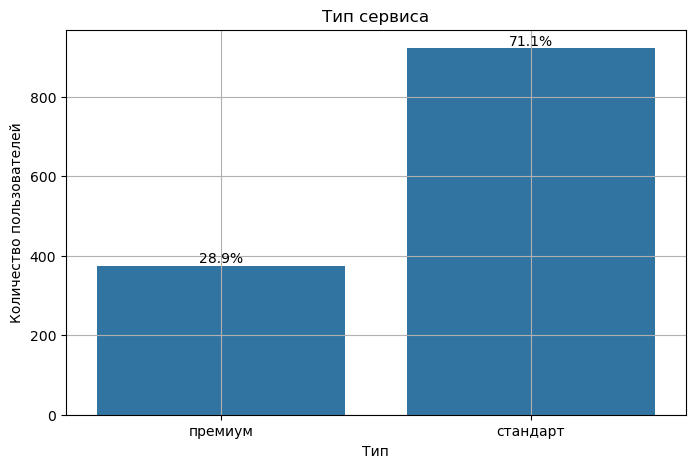

In [26]:
plt.figure(figsize=(8, 5))
ax = sn.countplot(x='Тип_сервиса', data=market_file)

total = len(market_file) 
for p in ax.patches:
    height = p.get_height()  # Высота столбца
    percentage = (height / total) * 100  # Вычисление процента
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

plt.title('Тип сервиса')
plt.xlabel('Тип')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

У 71% покупателей тип сервиса "стандарт", а у 29% "премиум".

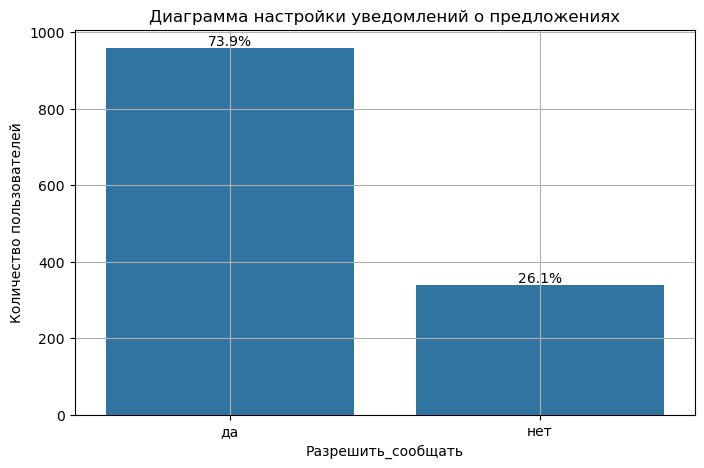

In [27]:
plt.figure(figsize=(8, 5))
ax = sn.countplot(x='Разрешить_сообщать', data=market_file)

total = len(market_file) 
for p in ax.patches:
    height = p.get_height()  # Высота столбца
    percentage = (height / total) * 100  # Вычисление процента
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

plt.title('Диаграмма настройки уведомлений о предложениях')
plt.xlabel('Разрешить_сообщать')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

У 74% покупателей разрешены уведомления, а у 26% нет.

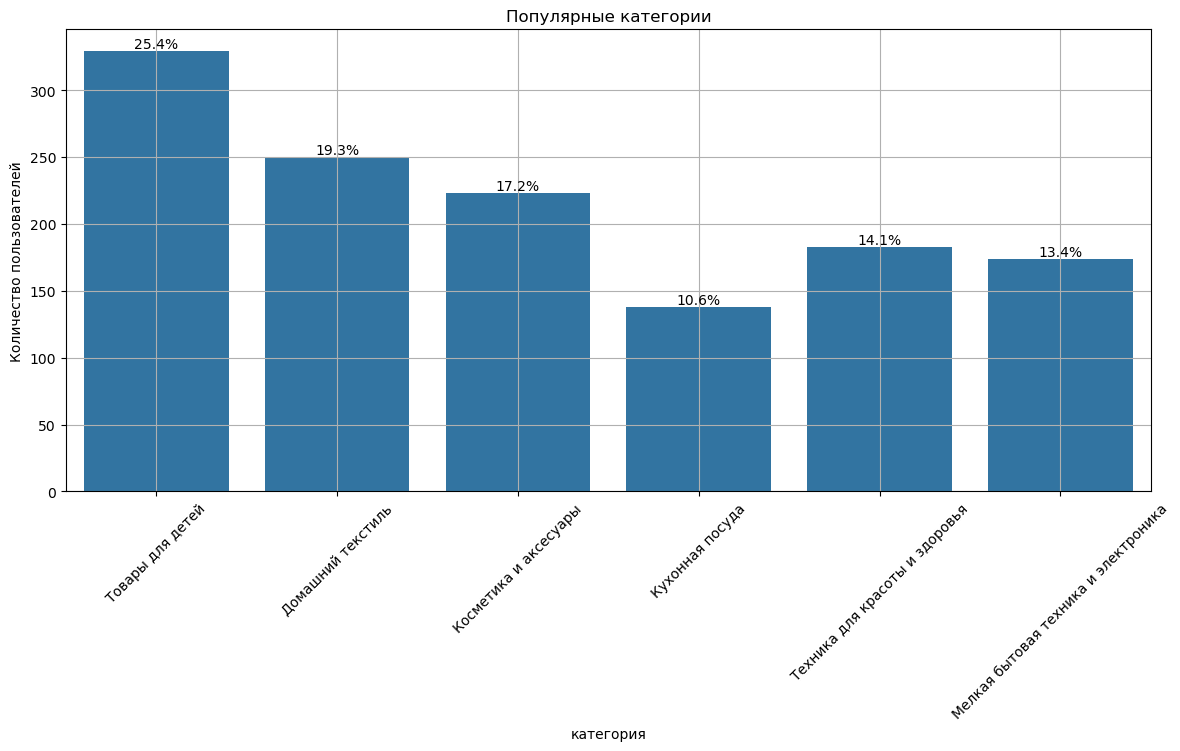

In [28]:
plt.figure(figsize=(14, 6))
ax = sn.countplot(x='Поп_кат', data=market_file)

total = len(market_file) 
for p in ax.patches:
    height = p.get_height()  # Высота столбца
    percentage = (height / total) * 100  # Вычисление процента
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

plt.title('Популярные категории')
plt.xlabel('категория')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Самая популярная категория "Товары для детей", она популярна у четверти пользователей, второй по популярности идет "Домашний текстиль" с 19%, а последней по популярности "Кухонная посуда", она популярна у 11% пользователей.

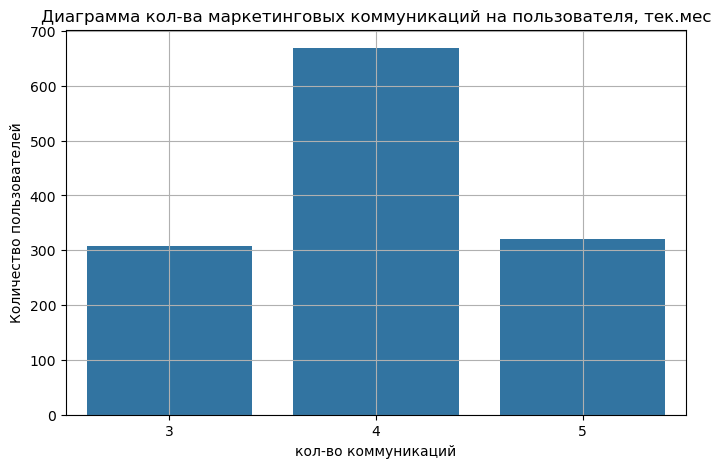

In [29]:
plt.figure(figsize=(8, 5))
sn.countplot(x='Маркет_актив_тек_мес', data=market_file)
plt.title('Диаграмма кол-ва маркетинговых коммуникаций на пользователя, тек.мес')
plt.xlabel('кол-во коммуникаций')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

В текущем месяце наблюдаем 3-5 коммункаций на пользователя, большинство пользователей получили 4 коммуникации в текущем месяце. В текущем месяце имеем меньший разброс кол-ва коммуникаций на пользователя, чем за последние 6 месяцев: 3-5 вместо 1-6.

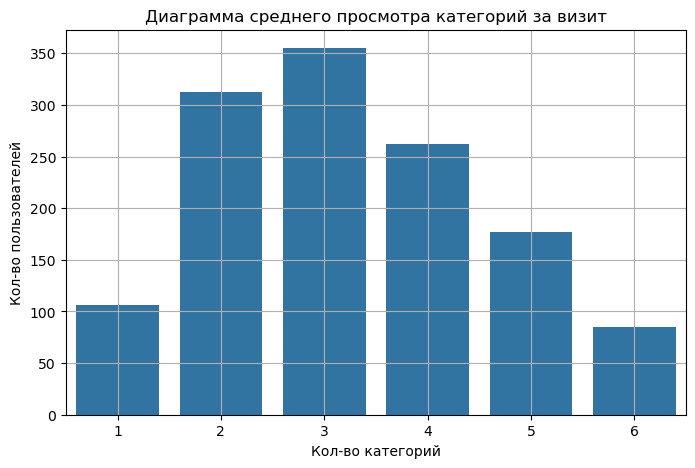

In [30]:
plt.figure(figsize=(8, 5))
sn.countplot(x='Средний_просмотр_категорий_за_визит', data=market_file)
plt.title('Диаграмма среднего просмотра категорий за визит')
plt.xlabel('Кол-во категорий')
plt.ylabel('Кол-во пользователей')
plt.grid(True)
plt.show()

Пользователи чаще всего просматривают 2-3 категории за визит, реже всего одну категорию или все 6 представленных категорий.

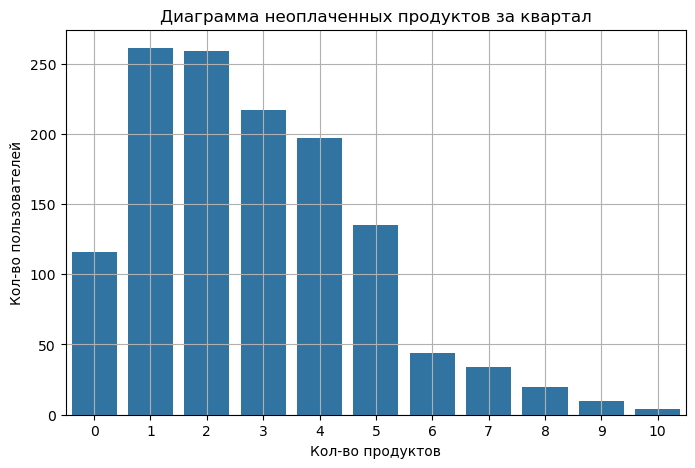

In [31]:
plt.figure(figsize=(8, 5))
sn.countplot(x='Неоплаченные_продукты_штук_квартал', data=market_file)
plt.title('Диаграмма неоплаченных продуктов за квартал')
plt.xlabel('Кол-во продуктов')
plt.ylabel('Кол-во пользователей')
plt.grid(True)
plt.show()

Пользователи имеют от 0 до 10 неоплаченных продуктов за квартал, чаще всего 1-2 неоплаченных продукта. 

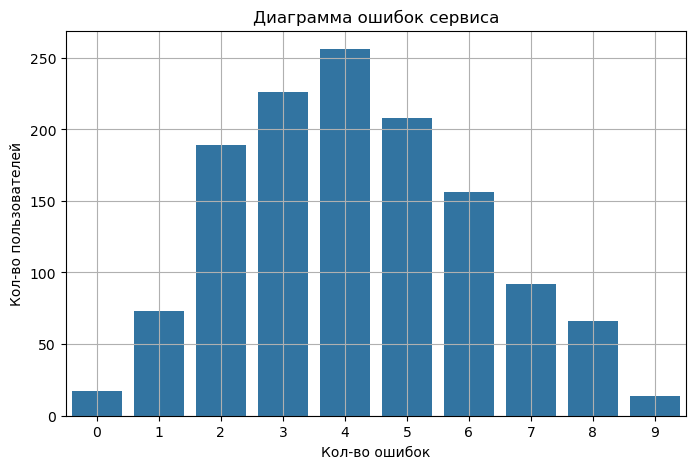

In [32]:
plt.figure(figsize=(8, 5))
sn.countplot(x='Ошибка_сервиса', data=market_file)
plt.title('Диаграмма ошибок сервиса')
plt.xlabel('Кол-во ошибок')
plt.ylabel('Кол-во пользователей')
plt.grid(True)
plt.show()

Пользователи сталкиваются с 1-9 ошибок сервиса во время посещения сайт, чаще всего с 4 ошибками. 

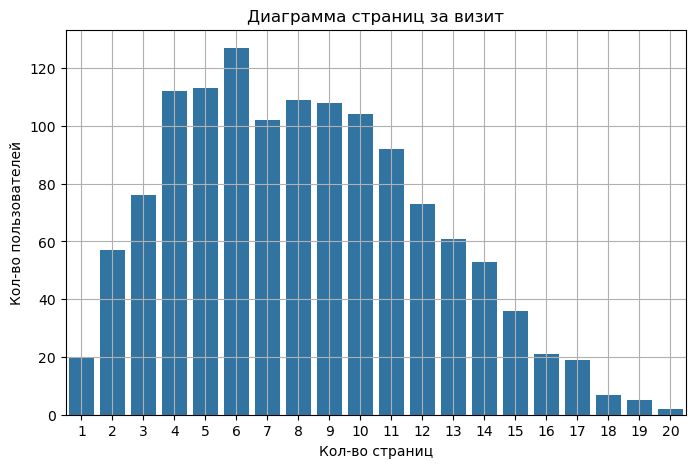

In [33]:
plt.figure(figsize=(8, 5))
sn.countplot(x='Страниц_за_визит', data=market_file)
plt.title('Диаграмма страниц за визит')
plt.xlabel('Кол-во страниц')
plt.ylabel('Кол-во пользователей')
plt.grid(True)
plt.show()

Пользователи просматривают 1-20 страниц за визит на сайт, чаще всего 6 страниц. 

Гистограммы выглядят корректно.

**Вывод:** 
У 62% покупателей прежний уровень активность, а 38 % покупателей имеют уровень активность "снизилась". У 71% покупателей тип сервиса "стандарт", а у 29% "премиум". У 74% покупателей разрешены уведомления, а у 26% нет.
Самая популярная категория "Товары для детей", она популярна у четверти пользователей, второй по популярности идет "Домашний текстиль" с 19%, а последней по популярности "Кухонная посуда", она популярна у 11% пользователей.

Гистограмма дней с момента регистрации имеет один пик в значении около 600-610, и несколько небольших пиков по всей оси x, что говорит о том, что были локальные пики регистрации пользователей, возможно при рекламных акциях или сезонах распродаж. 
Гистограмма доли акционных покупок от общего числа покупок имеет два пика: около 0.3 и 0.9. Таким образом, пользователи делятся на две группы: те, кто покупают в основном только по акции и те, кто используют акционные предложения только в 10-40 % покупок.

Пользователи чаще всего просматривают 2-3 категории за визит, реже всего одну категорию или все 6 представленных категорий.  Пользователи имеют от 0 до 10 неоплаченных продуктов за квартал, чаще всего 1-2 неоплаченных продукта.
Пользователи сталкиваются с 1-9 ошибок сервиса во время посещения сайт, чаще всего с 4 ошибками. Пользователи просматривают 1-20 страниц за визит на сайт, чаще всего 6 страниц.

Среднемесячное значение маркетинговых коммуникаций компании на покупателя за последние 6 месяцев имеет пик около 4, и небольшие пики около 2.5 и 5.5. В целом у большинства пользователей достаточно высокое среднемесячное количество коммуникаций - около 4 и более. 
В текущем месяце наблюдаем 3-5 коммункаций на пользователя, большинство пользователей получили 4 коммуникации в текущем месяце. В текущем месяце имеем меньший разброс кол-ва коммуникаций на пользователя, чем за последние 6 месяцев: 3-5 вместо 1-6. 


**Исследуем количественные значения market_file.**

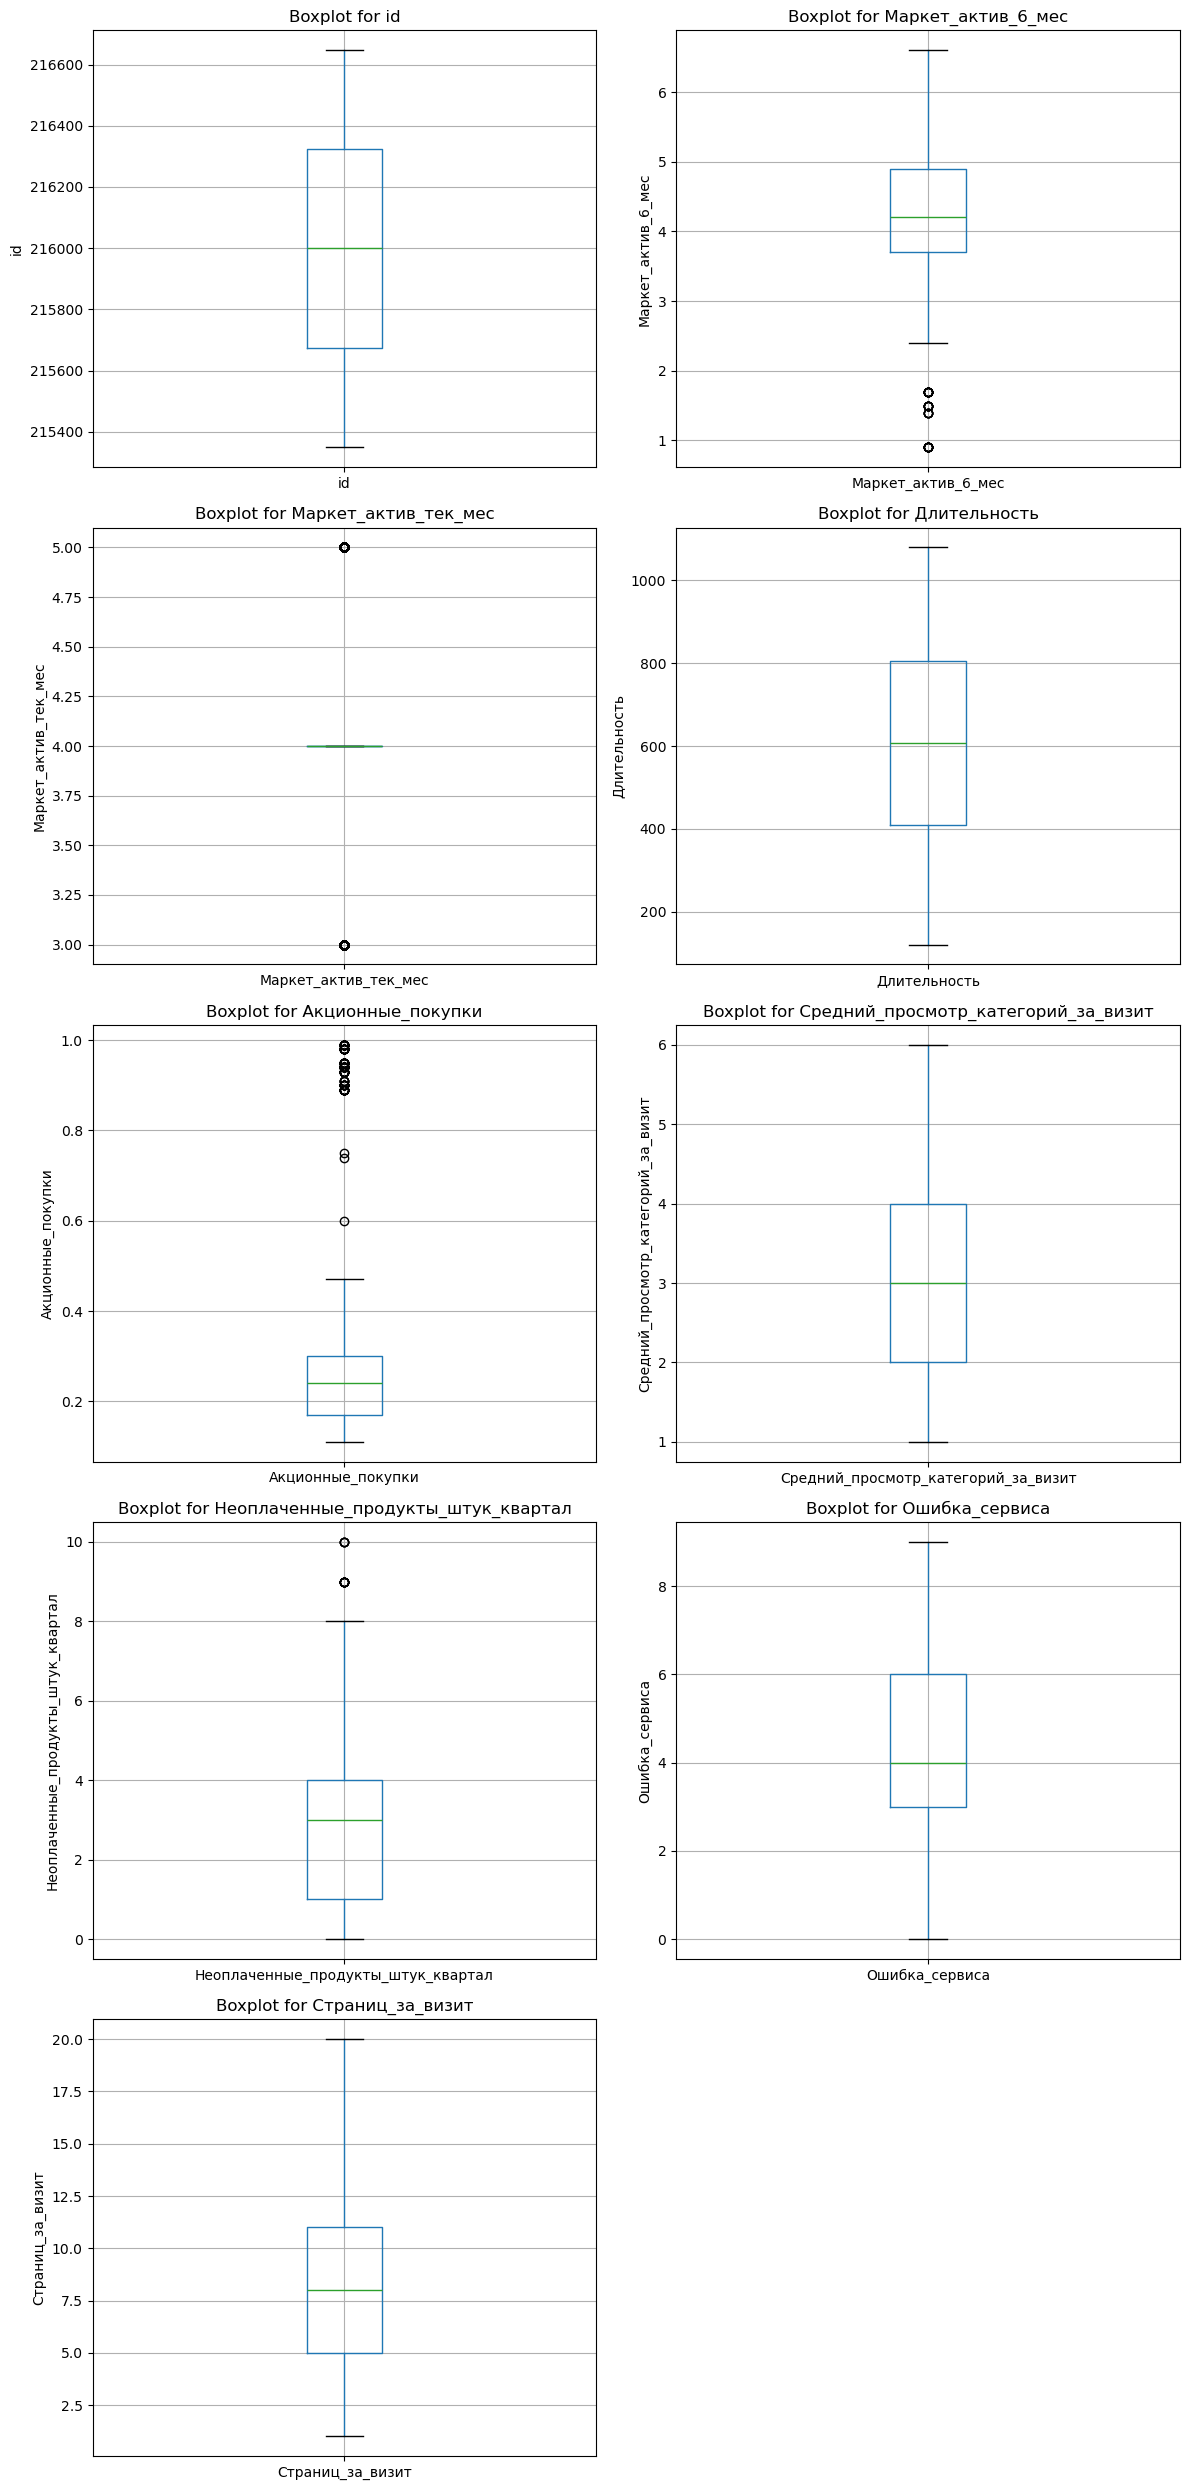

In [34]:
numeric_cols = market_file.select_dtypes(include='number').columns

# Определяем количество подграфиков
num_cols = len(numeric_cols)
num_rows = (num_cols + 1) // 2  # Количество строк

plt.figure(figsize=(12, num_rows * 5))  # Размер фигуры

# Создаем boxplot для каждого числового столбца
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 2, i + 1)  # Определяем расположение подграфика
    market_file.boxplot(column=col)
    plt.title(f'Boxplot for {col}')
    plt.ylabel(col)
    plt.grid(True)

plt.tight_layout()  # Упаковка графиков
plt.show()  # Показываем все графики

На диаграммах размаха данные выглядят корректными.

Следующие столбцы содержат несколько выбивающихся значений:

- Маркет_актив__6_мес — среднемесячное значение маркетинговых коммуникаций.
- Акционные_покупки — среднемесячная доля покупок по акции.
- Неоплаченные_продукты_штук_квартал — число неоплаченных товаров.


Тем не менее выбивающиеся значения выглядят приемлемыми, оставим их.


**Исследуем качественные значения market_file.**

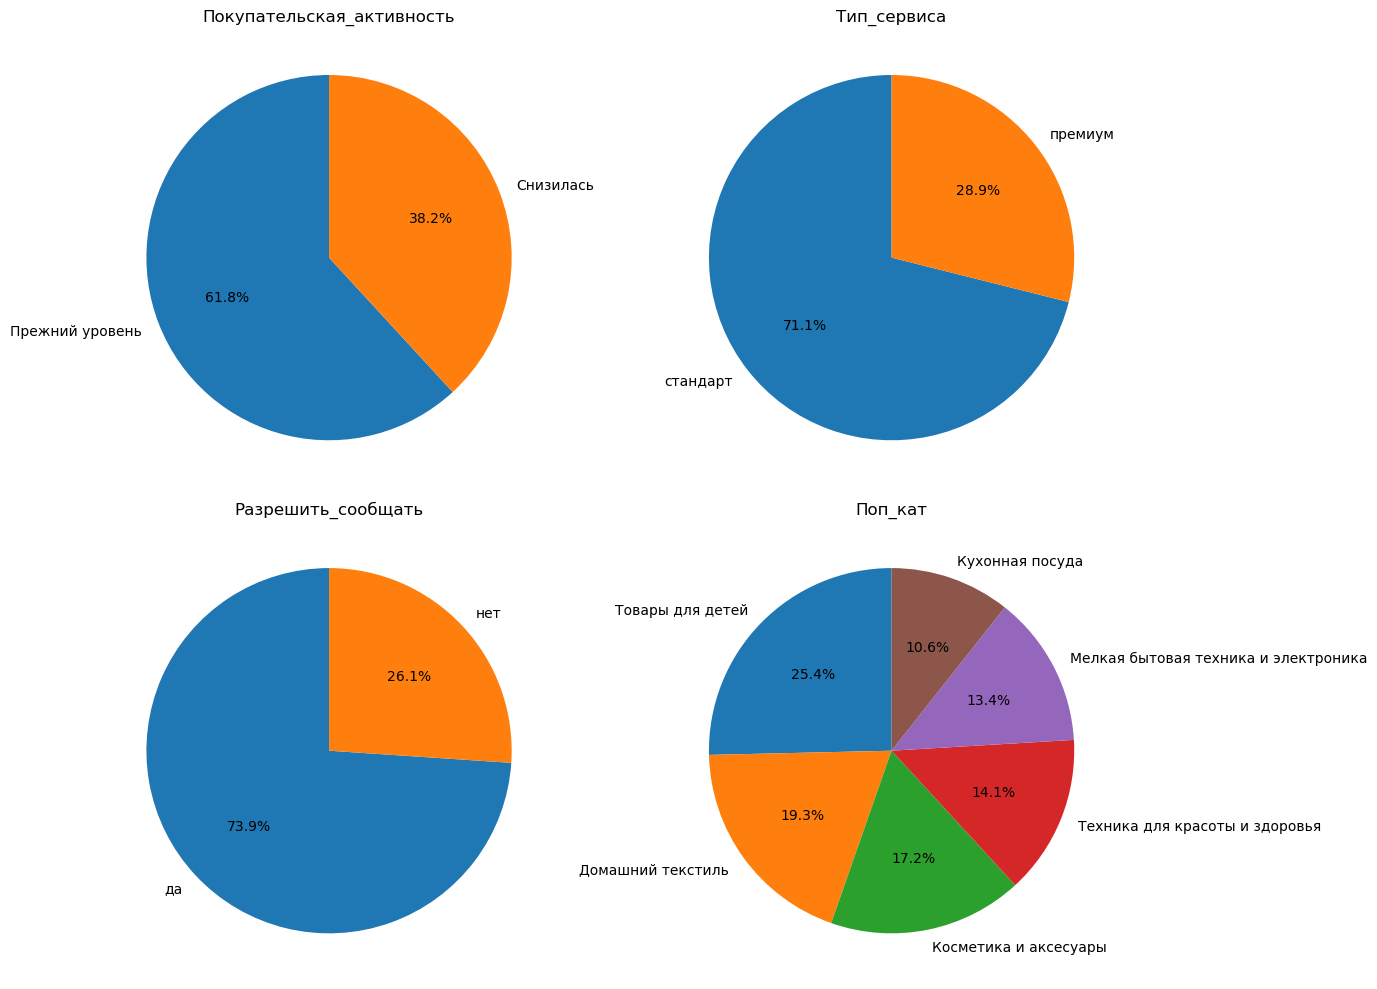

In [35]:
non_numeric_cols = market_file.select_dtypes(exclude='number').columns

# Определяем количество подграфиков
num_cols = len(non_numeric_cols)
num_rows = (num_cols + 1) // 2  # Количество строк

plt.figure(figsize=(14, num_rows * 5))  # Размер фигуры

# Создаем круговую диаграмму для каждого ненумерического столбца
for i, col in enumerate(non_numeric_cols):
    plt.subplot(num_rows, 2, i + 1)  # Определяем расположение подграфика
    market_file[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)  # Круговая диаграмма
    plt.title(f'{col}')
    plt.ylabel('')  # Убираем метку оси Y для чистоты графика
    plt.grid(True)

plt.tight_layout()  # Упаковка графиков
plt.show()  # Показываем все графики


Визуально оценив распределение данных в категориальных столбцах датасета market_file, можно сделать вывод, что данные корректны.

В датафрейме market_file данные корректны.

**Исследуем датафрейм market_money**

In [36]:
market_money.describe()

,id,Выручка
count,3891.000000,3891.000000
mean,215998.986893,5033.718890
std,374.482249,1768.471286
min,215349.000000,2758.700000
25%,215675.000000,4592.000000
50%,215999.000000,4959.000000
75%,216323.000000,5363.200000
max,216647.000000,106862.200000


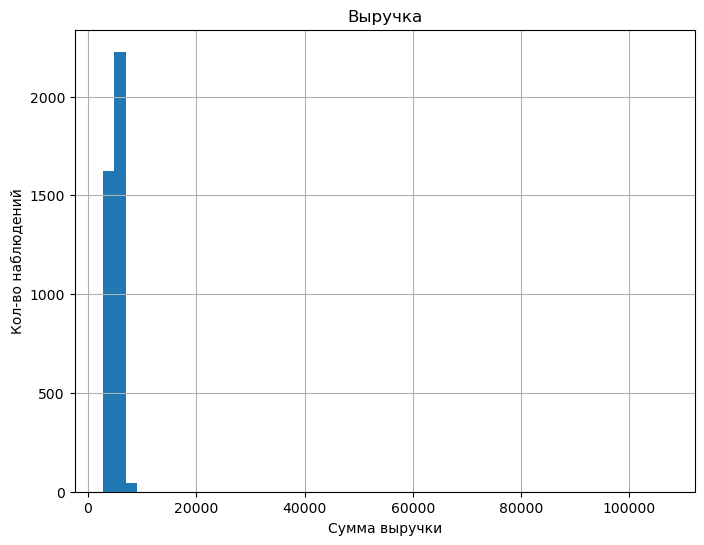

In [37]:
market_money.drop(columns='id').hist(bins=50, figsize=(8, 6), grid=True)

# Отображение графиков
plt.xlabel('Cумма выручки')
plt.ylabel('Кол-во наблюдений')
plt.show()

Судя по гистограмме, в столбце 'Выручка' присутствуют выбросы. Посмотрим диаграмму размаха для Выручки.

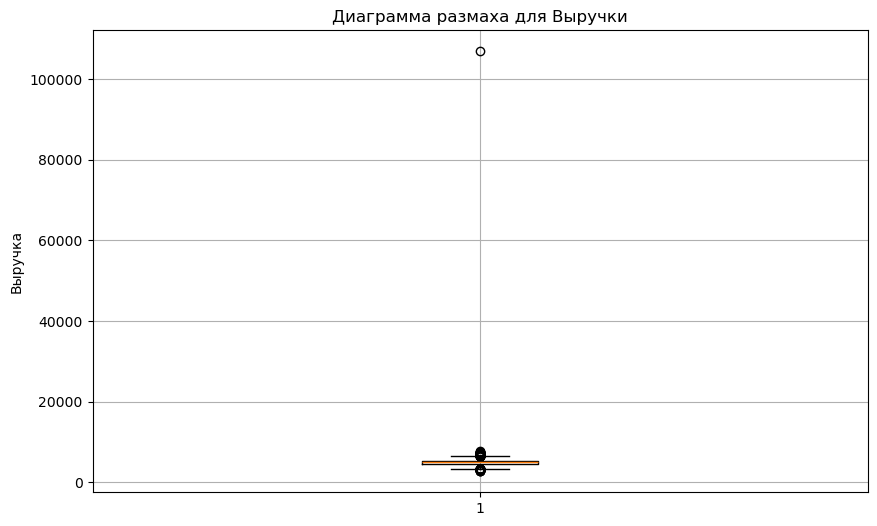

In [38]:
plt.figure(figsize=(10, 6))
plt.boxplot(market_money['Выручка']) 
plt.title('Диаграмма размаха для Выручки')
plt.ylabel('Выручка')
plt.grid()
plt.show()

В столбце 'Выручка' датафрейма market_money есть аномально сильный выброс, который необходимо удалить.

Удалим выброс и проверим оставшиеся значения.

In [39]:
market_money = market_money.query('Выручка < 20000')

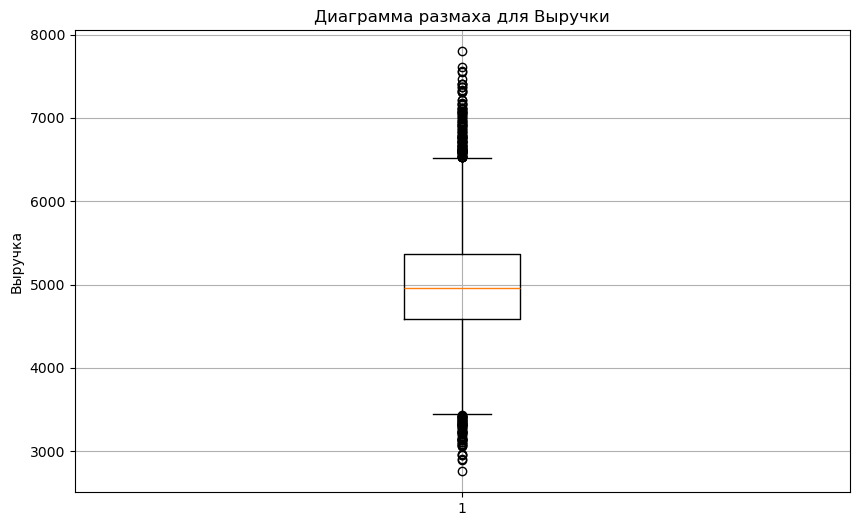

In [40]:
plt.figure(figsize=(10, 6))
plt.boxplot(market_money['Выручка'])  # Удаляем NaN значения
plt.title('Диаграмма размаха для Выручки')
plt.ylabel('Выручка')
plt.grid()
plt.show()

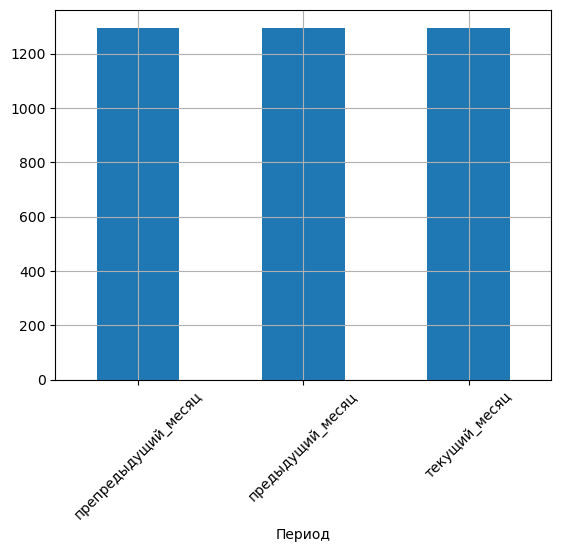

In [41]:
market_money['Период'].value_counts().plot(kind='bar')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

В датафрейме market_money данные корректны.

**Исследуем датафрейм market_time**

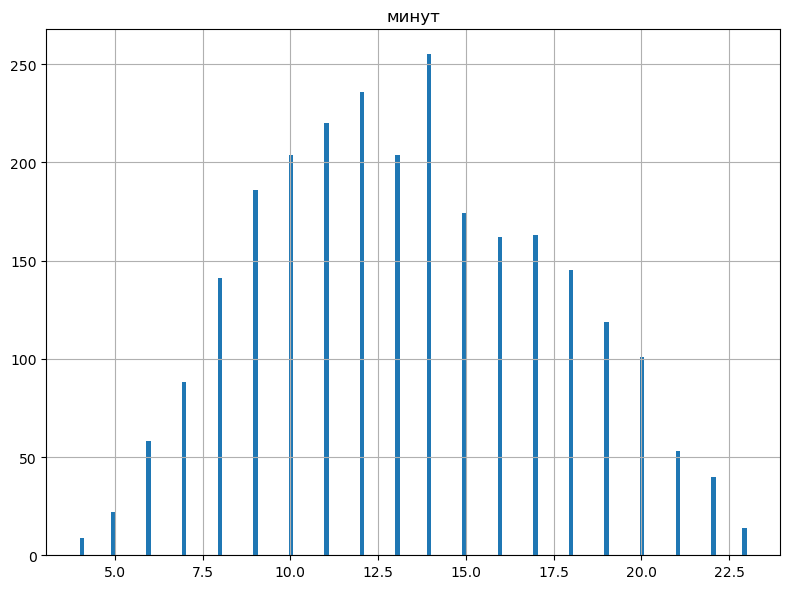

In [42]:
market_time.drop(columns='id').hist(bins=150, figsize=(8, 6), grid=True)
plt.tight_layout()
plt.show()

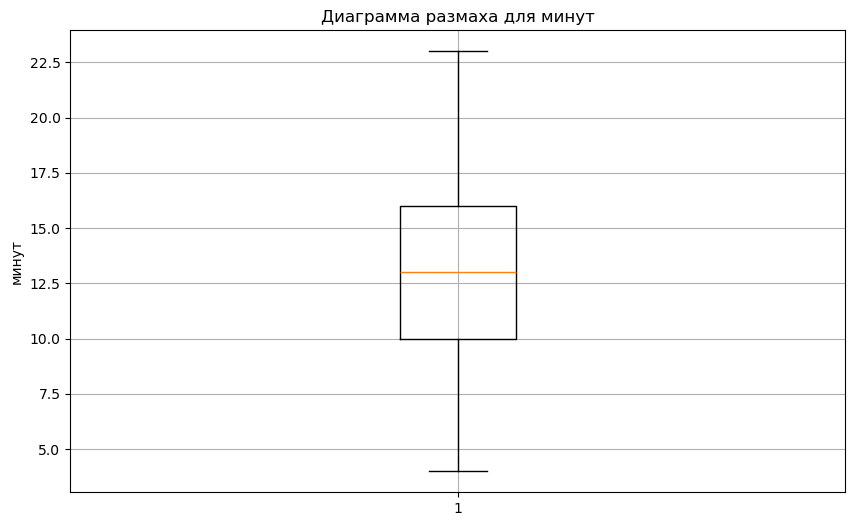

In [43]:
plt.figure(figsize=(10, 6))
plt.boxplot(market_time['минут'])  # Удаляем NaN значения
plt.title('Диаграмма размаха для минут')
plt.ylabel('минут')
plt.grid()
plt.show()

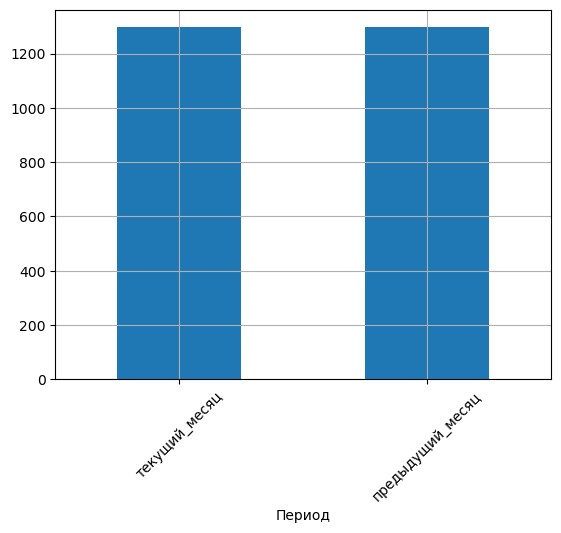

In [44]:
market_time['Период'].value_counts().plot(kind='bar')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

В датафрейме market_time данные корректны.

**Исследуем датафрейм money**

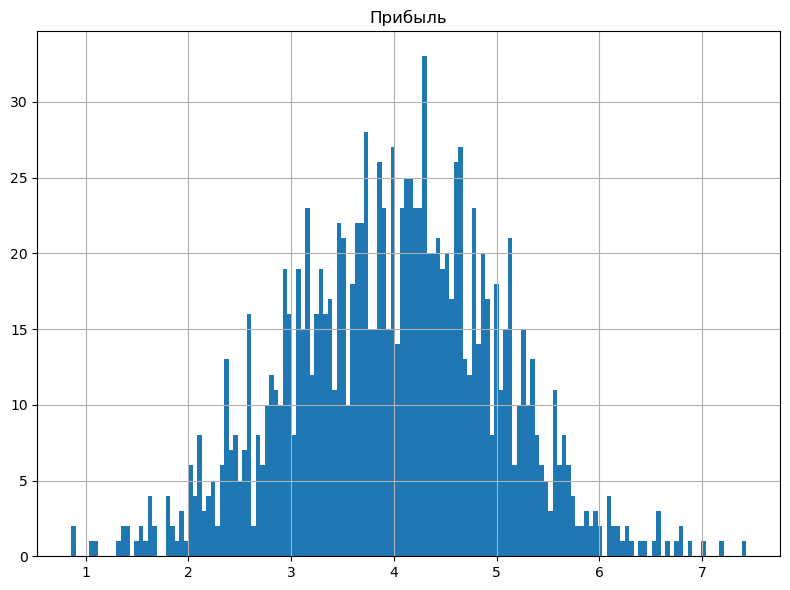

In [45]:
money.drop(columns='id').hist(bins=150, figsize=(8, 6), grid=True)
plt.tight_layout()
plt.show()

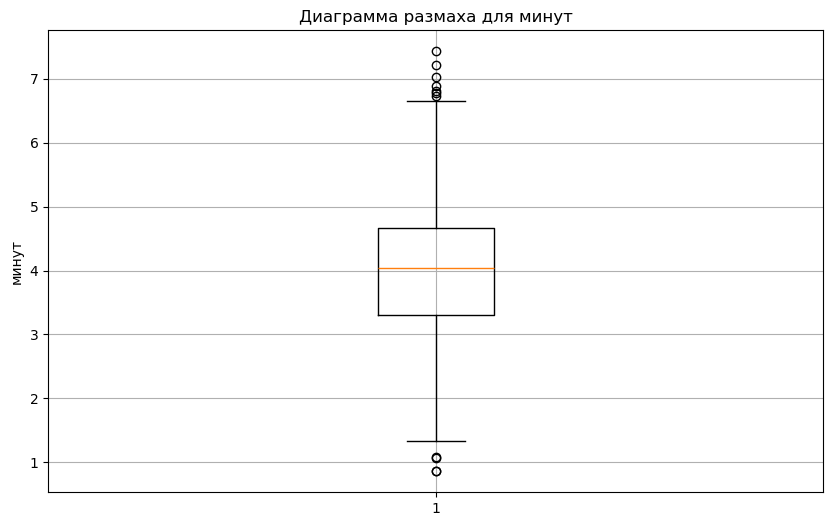

In [46]:
plt.figure(figsize=(10, 6))
plt.boxplot(money['Прибыль'])  # Удаляем NaN значения
plt.title('Диаграмма размаха для минут')
plt.ylabel('минут')
plt.grid()
plt.show()

Данные корректны. Выбросы в столбце 'Прибыль' не выглядят аномальными, оставляем их. В датафрейме money данные корректны.

**Вывод: Были проанализированны все признаки, для количественных признаков были построены гистограммы и ящики с усами, для категориальных - круговые диаграммы. В столбце 'Выручка' датафрейма market_money был аномально сильный выброс, который удалили. Остальные данные корректны.**

## Объединение таблиц

In [47]:
market_file.head()

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Поп_кат,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4


In [48]:
market_money.head()

,id,Период,Выручка
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4


In [49]:
market_time.head()

,id,Период,минут
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдущий_месяц,8
6,215351,текущий_месяц,13


**Сделаем сводную таблицу для market_time.**

In [50]:
market_time_pivot = market_time.pivot_table(index='id', columns='Период', values='минут', aggfunc='first').reset_index()

In [51]:
# Убираем строку, задающую имя для индекса столбцов
market_time_pivot.columns.name = None

In [52]:
market_time_pivot = market_time_pivot.rename(columns={'id': 'id', 
                                                      'предыдущий_месяц': 'минуты_предыдущий_месяц', 
                                                      'текущий_месяц': 'минуты_текущий_месяц'}
                                            )
market_time_pivot

,id,минуты_предыдущий_месяц,минуты_текущий_месяц
0,215349,12,10
1,215350,8,13
2,215351,11,13
3,215352,8,11
4,215353,10,10
...,...,...,...
1292,216643,14,7
1293,216644,12,11
1294,216645,12,18
1295,216646,18,7


<br/>
<div class="alert alert-info">
Спасибо, учту.
</div>

**Сделаем сводную таблицу для market_money.**

In [53]:
market_money_pivot = market_money.pivot_table(index='id', columns='Период', values='Выручка', aggfunc='first').reset_index()
market_money_pivot.columns.name = None
market_money_pivot = market_money_pivot.rename(columns={'id': 'id', 'предыдущий_месяц': 'выручка_предыдущий_месяц', 'препредыдущий_месяц': 'выручка_препредыдущий_месяц', 'текущий_месяц': 'выручка_текущий_месяц'})
market_money_pivot.head()

,id,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5


Добавим получившиеся таблицы к основной.

In [54]:
data = pd.merge(market_file, pd.merge(market_money_pivot, 
                                      market_time_pivot, 
                                      left_index=True, 
                                      right_index=True), left_index=True, right_index=True).drop(['id_x','id_y'], axis = 1)
print(data.isnull().sum())

id                                     0
Покупательская_активность              0
Тип_сервиса                            0
Разрешить_сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Поп_кат                                0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  1
минуты_предыдущий_месяц                0
минуты_текущий_месяц                   0
dtype: int64


In [55]:
data = data.dropna()
data.set_index('id', inplace=True)
data.shape

(1293, 17)

**Вывод: Объединены таблицы market_file.csv, market_money.csv, market_time.csv. В итоговой таблице сделайте отдельный столбец для каждого периода. Таблицы были объединены, в результате был обнаружен один пропуск, он был удален.**

## Корреляционный анализ

Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделаем выводы о мультиколлинеарности и при необходимости устраните её.


In [56]:
phik_corr = data.phik_matrix(interval_cols=['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц','выручка_текущий_месяц']) 
phik_corr

,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Поп_кат,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минуты_предыдущий_месяц,минуты_текущий_месяц
Покупательская_активность,1.000000,0.133947,0.000000,0.546667,0.000000,0.101688,0.508749,0.296462,0.538282,0.504919,0.224359,0.748034,0.218547,0.494088,0.199914,0.678624,0.576983
Тип_сервиса,0.133947,1.000000,0.287070,0.091816,0.045743,0.399642,0.028671,0.068967,0.188847,0.119440,0.077002,0.099231,0.000000,0.066674,0.041526,0.066338,0.000000
Разрешить_сообщать,0.000000,0.287070,1.000000,0.000000,0.052224,0.253308,0.018698,0.071661,0.070284,0.193532,0.000000,0.037603,0.083521,0.000000,0.059542,0.000000,0.000000
Маркет_актив_6_мес,0.546667,0.091816,0.000000,1.000000,0.074465,0.000000,0.278634,0.148968,0.206089,0.285321,0.145096,0.395250,0.166571,0.294074,0.000000,0.300087,0.280988
Маркет_актив_тек_мес,0.000000,0.045743,0.052224,0.074465,1.000000,0.178117,0.000000,0.131856,0.246042,0.145934,0.118621,0.000000,0.090598,0.000000,0.000000,0.042043,0.019565
Длительность,0.101688,0.399642,0.253308,0.000000,0.178117,1.000000,0.000000,0.000000,0.186287,0.197087,0.175944,0.122225,0.000000,0.124547,0.000000,0.000000,0.119919
Акционные_покупки,0.508749,0.028671,0.018698,0.278634,0.000000,0.000000,1.000000,0.121864,0.200593,0.237492,0.000000,0.311768,0.083473,0.211851,0.057561,0.286099,0.252952
Поп_кат,0.296462,0.068967,0.071661,0.148968,0.131856,0.000000,0.121864,1.000000,0.228356,0.250534,0.000000,0.160515,0.068554,0.101922,0.038407,0.114877,0.051610
Средний_просмотр_категорий_за_визит,0.538282,0.188847,0.070284,0.206089,0.246042,0.186287,0.200593,0.228356,1.000000,0.325531,0.070883,0.261289,0.098123,0.185415,0.064942,0.205158,0.152005
Неоплаченные_продукты_штук_квартал,0.504919,0.119440,0.193532,0.285321,0.145934,0.197087,0.237492,0.250534,0.325531,1.000000,0.040924,0.363741,0.143662,0.214427,0.159365,0.287784,0.223591


Между признаками наблюдается:


Сильная корреляция (значения выше 0.7):

* 0.84 - 'выручка_предыдущий_месяц' и 'выручка_текущий_месяц'

* 0.75 - 'Покупательская активность' и 'страниц за визит'


Умеренная корреляция (значения от 0.4 до 0.7):

* 0.68 -'Покупательская активность' и 'минуты_предыдущий_месяц'

* 0.58 -'Покупательская активность' и 'минуты_предыдущий_месяц'
* 0.55 - 'Покупательская_активность' и 'Маркет_актив__6_мес'
* 0.54 - 'Покупательская_активность' и 'Средний_просмотр_категорий_за_визит'
* 0.51 - 'Покупательская_активность' и 'Акционные_покупки'
* 0.54 - 'Покупательская_активность' и 'Неоплаченные_продукты_штук_квартал'
* 0.49 - 'Покупательская_активность' и 'выручка_препредыдущий_месяц'

Слабая корреляция или отсутствие корреляции для остальных признаков.



Признаки 'выручка_текущий_месяц' и 'выручка_предыдущий_месяц' сильно взаимосвязаны, но так как эта связь не с целевым признаком, то делать ничего не нужно.

**Вывод: Провели корреляционный анализ признаков итоговой таблицы для моделирования. Выявили сильную корреляцию между признаками 0.84 - 'выручка_предыдущий_месяц' и 'выручка_текущий_месяц', а также 0.75 - между 'Покупательская активность' и 'страниц за визит' Приняли решение, что целесообразно оставить оба признака.**

<br/>
<div class="alert alert-info">
Спасибо, постараюсь в будущем учесть.
</div>

## Использование пайплайнов

### Создадим пайплайны. Используем ColumnTransformer для подготовки данных. Для кодирования категориальных признаков используем два кодировщика, для масштабирования количественных два скейлера.

In [57]:
ohe_columns = ['Разрешить_сообщать', 'Поп_кат']
ord_columns = ['Тип_сервиса']
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'выручка_препредыдущий_месяц','выручка_предыдущий_месяц','выручка_текущий_месяц' ,'минуты_предыдущий_месяц', 'минуты_текущий_месяц']
RANDOM_STATE = 42

y = data['Покупательская_активность']
X = data.drop(['Покупательская_активность'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE
) 

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']
                ], 
                handle_unknown='ignore'
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

In [58]:
classes = label_encoder.classes_

# Проверка соответствия значений
for idx, class_name in enumerate(classes):
    print(f"{idx} соответствует {class_name}")

0 соответствует Прежний уровень
1 соответствует Снизилась


### Обучим четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). Для каждой из них подберем гиперпараметры. 

Выберем метрику ROC AUC, так как она учитывает все возможные пороги классификации и показывает, насколько хорошо модель различает положительные и отрицательные классы. ROC AUC позволяет легко сравнивать различные модели при переборе гиперпараметров.

In [59]:
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])


param_grid = [
    
        # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()    
    {
        'models': [SVC(random_state=RANDOM_STATE, probability= True)],
        'models__C': range(1, 5),
        'models__kernel': ['rbf', 'linear', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,10),
        'models__max_features': range(2,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
        # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    }

]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели при кросс-валидации:', randomized_search.best_score_)

ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py", line 1001, in fit_transform
    result = self._call_func_on_transformers(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py", line 910, in _call_func_on_transformers
    return Parallel(n_jobs=self.n_jobs)(jobs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 77, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\joblib\parallel.py", line 1918, in __call__
    return output if self.return_generator else list(output)
                                                ^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\joblib\parallel.py", line 1847, in _get_sequential_output
    res = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 139, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 718, in fit_transform
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\base.py", line 921, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'handle_unknown' parameter of OrdinalEncoder must be a str among {'error', 'use_encoded_value'}. Got 'ignore' instead.

--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py", line 1001, in fit_transform
    result = self._call_func_on_transformers(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py", line 910, in _call_func_on_transformers
    return Parallel(n_jobs=self.n_jobs)(jobs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 77, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\joblib\parallel.py", line 1918, in __call__
    return output if self.return_generator else list(output)
                                                ^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\joblib\parallel.py", line 1847, in _get_sequential_output
    res = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 139, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 718, in fit_transform
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\base.py", line 921, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\jenechka\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'handle_unknown' parameter of OrdinalEncoder must be a str among {'use_encoded_value', 'error'}. Got 'ignore' instead.


### Таким образом, лучшая модель и её параметры:

LogisticRegression(C=4, penalty='l1', random_state=42, solver='liblinear'))])

Метрика лучшей модели на тренировочной выборке: 0.91

**Вывод: На данном шаге мы бучили четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). Для каждой из них подобрали гиперпараметры. Выбрали метрику ROC AUC для оценки качества модели. Лучшая моделью оказалась LogisticRegression с параметрами:**

* C=4,
* penalty='l1',
* random_state=42,
* solver='liblinear'

**Метрика лучшей модели на тренировочной выборке: 0.91.**

## Анализ важности признаков


### Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP. 

In [ ]:
best_model = randomized_search.best_estimator_
best_model.fit(X_train, y_train)

In [ ]:
ohe_columns = ['Разрешить_сообщать', 'Поп_кат']
ord_columns = ['Тип_сервиса']
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'выручка_препредыдущий_месяц','выручка_предыдущий_месяц','выручка_текущий_месяц' ,'минуты_предыдущий_месяц', 'минуты_текущий_месяц']
RANDOM_STATE = 42

y = data['Покупательская_активность']
X = data.drop(['Покупательская_активность'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE
) 

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error', sparse_output =False)
        )
    ]
)

ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
               (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']
                ], 
                handle_unknown='error'
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(C=4, penalty='l1', random_state=42, solver='liblinear'))
    ])

In [ ]:
pipe_final.fit(X_train, y_train)

# Преобразование данных
X_train_transformed = pipe_final.named_steps['preprocessor'].transform(X_train)
X_test_transformed = pipe_final.named_steps['preprocessor'].transform(X_test)

In [ ]:
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
explainer = shap.LinearExplainer(pipe_final.named_steps['models'], X_train_transformed, feature_names=feature_names)
shap_values = explainer(X_train_transformed)

shap.plots.beeswarm(shap_values,max_display = 21) 

In [ ]:
predictions = pipe_final.named_steps['models'].predict(X_test_transformed)

explainer = shap.LinearExplainer(pipe_final.named_steps['models'], X_test_transformed, feature_names=feature_names)
shap_values = explainer(X_test_transformed)
shap.plots.bar(shap_values, max_display=21) 

### Сделаем выводы о значимости признаков:


Признаки мало значимые для модели:

* Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре.
* Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
* Популярная_категория "Косметика и аксессуары"
* Популярная_категория "Товары для детей"


Признаки сильнее всего влияющие на целевой признак:

* Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* Средний_просмотр_категорий_за_визит — сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
* минуты_предыдущий_месяц
* минуты_текущий_месяц
* Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.




Как можно использовать эти наблюдения при моделировании и принятии бизнес-решений:

* Исключение мало значимых признаков: Удаление признаков, которые не влияют на целевой признак (например, "Разрешить сообщать", "Тип сервиса"), может упростить модель и снизить риск переобучения. Это также может ускорить процесс обучения модели и упростить интерпретацию результатов.

* Анализ поведения: Признаки, такие как "минутыпредыдущиймесяц" и "минутытекущиймесяц", могут помочь в сегментации клиентов по их активности. Это позволит выявить группы клиентов с высоким уровнем вовлеченности и разработать для них специальные предложения или программы лояльности.

* Целевая реклама: Зная, какие признаки влияют на покупки, компания может настроить рекламные кампании для определенных сегментов клиентов, повышая вероятность конверсии.

* Индивидуальные предложения: Используя данные о "Неоплаченныепродуктыштук_квартал", можно разработать персонализированные предложения для клиентов с неоплаченными товарами в корзине. Например, отправка напоминаний или специальных акций на эти товары может увеличить вероятность их покупки.

* Оптимизация акций: Признак "Акционные_покупки" может помочь в оценке эффективности акций и в планировании будущих предложений. Если клиенты активно покупают товары по акции, это может стать основой для разработки новых акционных стратегий.



Дополнительно проанализируем коэффициенты логистической регрессии.

In [ ]:
model = best_model.named_steps['models']
coefficients=model.coef_[0]
features=pipe_final.named_steps['preprocessor'].get_feature_names_out()
feature_importance = dict(zip(features, coefficients))
sorted_importance = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_importance_df = pd.DataFrame(sorted_importance, columns=['Признак', 'Важность'])
print(sorted_importance_df.to_string(index=False))

Наиболее значимые признаки:

Увеличение этих признаков будет способствовать значению целевой переменной "на прежнем уровне":

* Маркет_ актив_6_мес (-1.161934) 

* Выручка_предыдущий_месяц (-0.729236) 

* Минуты_предыдущий_месяц (-0.676923) 

* Длительность (-0.674722) 

* Маркет_актив_6_мес (-0.489729)

* Средний_просмотр_категорий_за_визит (-0.441846)

* минуты_текущий_месяц (-0.437753)

* выручка_текущий_месяц (-0.209072)

* Неоплаченные_продукты_штук_квартал (-0.144026)


Увеличение этих признаков будет способствовать значению целевой переменной "снизилась":

* Страниц_за_визит (0.706148)

* выручка_препредыдущий_месяц  (0.501890)

* Ошибка_сервиса  (0.182004)

* Акционные_покупки  (0.106259)

**Вывод:  Признаки, такие как "Разрешить сообщать" и "Тип сервиса", оказались мало значимыми для модели, в то время как "Акционные_покупки" и "Средний_просмотр_категорий_за_визит" значительно влияют на целевой признак. Исключение незначимых признаков может упростить модель, а анализ активных клиентов поможет в сегментации и создании специальных предложений.**

## Сегментация покупателей

### Выполним сегментацию покупателей. Используем результаты моделирования и данные о прибыльности покупателей.

Выберем сегмент покупателей, у которых прибыль выше среднего. Выбрали именно этот сегмент, так как прибыльных клиентов следует удерживать в первую очередь.

In [ ]:
segment = data.merge(money, on = 'id')
segment['Прибыль'].mean()

Отберем клиентов с прибылью свыше 5.

In [ ]:
segment = segment[segment['Прибыль']>4]

###  Исследуем данный сегмент, чтобы увеличить покупательскую активность:

Проведем графическое и аналитическое исследование группы покупателей.

In [ ]:
data.describe()

In [ ]:
segment.describe()

В целом сегменты сильно не отличаются, но в сегменте прибыльных клиентов меньшее значение "Неоплаченные_продукты_штук_квартал" (2.606796/ 2.838360), и больше "Длительность" (613.029126/ 602.641918)

Стандартное отклонение в прибыльном сегменте примерно на том же уровне, что в несегментированнных данных.

Проанализируем категориальные переменные.

In [ ]:
non_numeric_cols = segment.select_dtypes(exclude='number').columns

num_cols = len(non_numeric_cols)
num_rows = (num_cols + 1) // 2  

plt.figure(figsize=(14, num_rows * 5)) 

for i, col in enumerate(non_numeric_cols):
    plt.subplot(num_rows, 2, i + 1)  
    segment[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)  
    plt.title(f'{col}')
    plt.ylabel('')  
    plt.grid(True)

plt.tight_layout() 
plt.show()  

В прибыльном сегменте меньшее число пользователей с покупательской_активностью "Снизилось" (35.4%/ 38.2%), большее число покупателей с типом сервиса "Премиум" (30.1%/ 28.9%), у меньшего числа пользователей настройка уведомлений включена (70.4%/ 73.9%). Распределение категорий в прибыльном сегменте и несегментированных данных схоже, основные категории чуть более популярны: "Товары для детей"(26.7%/ 25.4%) и "Косметика и аксесуары"(21.8%/ 19.3%)

In [ ]:
plt.figure(figsize=(20, 6))  # Укажите желаемые размеры (ширина, высота) в дюймах

# Построение графика рассеяния
segment.plot(x='Прибыль', y='Акционные_покупки', kind='scatter', alpha=0.3, grid=True)

# Настройка заголовка и меток осей
plt.title('Корреляция')
plt.xlabel('Прибыль')
plt.ylabel('Акционные покупки')

# Показ графика
plt.show()

Интересно, что среди самых прибыльных клиентов меньше тех, кто пользуется акциями. Также на диаграмме пустоты от 0.4 до 0.8 -  неравномерное распределение акций среди покупателей.

Что можно предложить по работе с сегментом для увеличения покупательской активности:

* Предлагать больше акций клиентам с прибыльностью более 6.0-6.5.

* Увеличивать долю премиум клиентов.

* Больше акций в категориях, в которых меньше прибыльных клиентов.


### Сделаем выводы о сегментах:

Мы выбрали сегмент покупателей, у которых прибыль выше среднего, так как прибыльных клиентов следует удерживать в первую очередь.

Предложения для выбранного сегмента обоснованы следующими аргументами:

1. Предлагать больше акций клиентам с прибыльностью более 6.0-6.5:

   • Обоснование: Клиенты с высокой прибыльностью, вероятно, имеют больше возможностей и готовности тратить деньги на покупки. Предложение акций этим клиентам может стимулировать их к еще большим расходам, увеличивая общую прибыль. Акции могут также помочь удержать этих клиентов, предоставляя им дополнительные стимулы для покупок.
   

2. Увеличивать долю премиум клиентов:

   • Обоснование: Премиум клиенты обычно представляют собой более лояльную и прибыльную группу. Увеличение доли таких клиентов может привести к росту общей прибыльности бизнеса. Премиум клиенты также могут быть более восприимчивыми к эксклюзивным предложениям и акциям, что позволяет компании увеличить среднюю стоимость покупки.
   

3. Больше акций в категориях, в которых меньше прибыльных клиентов:

   • Обоснование: Если определенные категории имеют низкую популярность, это может свидетельствовать о недостаточной активности клиентов или недостаточном интересе к продуктам в этих категориях. Проведение акций может привлечь внимание к этим категориям, стимулировать спрос и повысить общую прибыльность. Это также может помочь выявить новые возможности для роста и расширения ассортимента.


**Вывод: Мы выбрали сегмент покупателей с прибылью выше среднего, так как их следует удерживать в первую очередь. Предложение акций клиентам с прибыльностью более 6.0-6.5 может стимулировать их к большим расходам и повысить общую прибыль. Увеличение доли премиум клиентов позволит улучшить лояльность и прибыльность бизнеса. Премиум клиенты более восприимчивы к эксклюзивным предложениям, что увеличивает среднюю стоимость покупки. Проведение акций в категориях с низкой популярностью поможет привлечь внимание и стимулировать спрос, открывая новые возможности для роста.**

## Вывод 

В проекте были поставлены две цели:

1.	Разработать модель, которая предскажет вероятность снижения покупательской активности.

2.	Выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность. 

Были выполнены следующие шаги:

Подключены необходимые библиотеки для работы с данными и визуализации. Созданы датафреймы, изучены типы данных, названия столбцов, найдены опечатки. 

Проведена предобработка данных. Пропуски в данных отсутствуют. Явных дубликатов нет. Неявных дубликатов нет. Исправлена опечатка в столбце 'Период', 'Тип_сервиса'.

На этапе исследовательского анализа были проанализированны все признаки, для количественных признаков были построены гистограммы и ящики с усами, для категориальных - круговые диаграммы. В столбце 'Выручка' датафрейма market_money был аномально сильный выброс, который удалили. Остальные данные корректны.

На шаге 4 объединены таблицы market_file.csv, market_money.csv, market_time.csv. В итоговой таблице сделайте отдельный столбец для каждого периода. Таблицы были объединены, в результате был обнаружен один пропуск, он был удален.

Проведен корреляционный анализ признаков итоговой таблицы для моделирования. Выявили сильную корреляцию между признаками 0.84 - 'выручка_предыдущий_месяц' и 'выручка_текущий_месяц', а также 0.75 - между 'Покупательская активность' и 'страниц за визит' Приняли решение, что целесообразно оставить оба признака.

На данном шаге мы бучили четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). Для каждой из них подобрали гиперпараметры. Выбрали метрику ROC AUC для оценки качества модели. Лучшая моделью оказалась LogisticRegression с параметрами:**

* C=4,
* penalty='l1',
* random_state=42,
* solver='liblinear'

Метрика лучшей модели на тренировочной выборке: 0.91.


На шаге 7 были выявлены признаки сильнее всего влияющие на целевой признак:

* Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.

* Средний_просмотр_категорий_за_визит — сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

На шаге 8 была проведена сегментация пользоваталей и анализ сегмента, после чего были выдвинуты следующие предложения для повышения покупательской активности:

* Предлагать больше акций клиентам с прибыльностью более 6.0-6.5.

* Увеличивать долю премиум клиентов.

* Больше акций в категориях, в которых меньше прибыльных клиентов.

Предложения для выбранного сегмента:

1. Предлагать больше акций клиентам с прибыльностью более 6.0-6.5:

Клиенты с высокой прибыльностью, вероятно, имеют больше возможностей и готовности тратить деньги на покупки. Предложение акций этим клиентам может стимулировать их к еще большим расходам, увеличивая общую прибыль. Акции могут также помочь удержать этих клиентов, предоставляя им дополнительные стимулы для покупок.
   

2. Увеличивать долю премиум клиентов:

Премиум клиенты обычно представляют собой более лояльную и прибыльную группу. Увеличение доли таких клиентов может привести к росту общей прибыльности бизнеса. Премиум клиенты также могут быть более восприимчивыми к эксклюзивным предложениям и акциям, что позволяет компании увеличить среднюю стоимость покупки.
   

3. Больше акций в категориях, в которых меньше прибыльных клиентов:

Если определенные категории имеют низкую популярность, это может свидетельствовать о недостаточной активности клиентов или недостаточном интересе к продуктам в этих категориях. Проведение акций может привлечь внимание к этим категориям, стимулировать спрос и повысить общую прибыльность. Это также может помочь выявить новые возможности для роста и расширения ассортимента.
